<a href="https://colab.research.google.com/github/safacharfi/Fashion-MNIST-Classification-TensorFlow/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=keras.datasets.fashion_mnist

In [8]:
(train_images,train_label),(test_images,test_label)=data.load_data() # in TensorFlow/Keras, and they handle the split automatically.
train_label.shape


(60000,)

In [9]:
test_label.shape

(10000,)

In [10]:
print(train_label)

[9 0 0 ... 3 0 5]


In [11]:
#we don't know yet what those labels represents so we need to define each number signification
#for exp 0-->t-shirt/ 1 trouser...
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

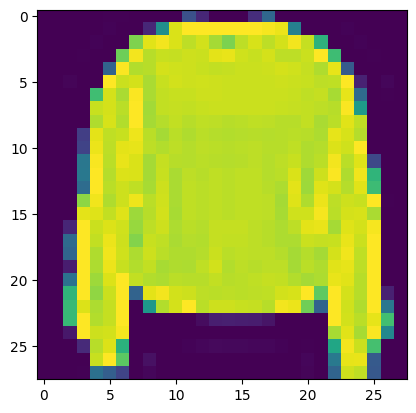

In [12]:
#visualize the dataset
plt.imshow(train_images[7])
plt.show()

Dividing the train_images and test_images by 255.0 is done to normalize the pixel values of the images.

Here's why this step is important:

1. Pixel values of images:
In the fashion_mnist dataset (and most image datasets), each pixel in an image is represented by an integer value between 0 and 255.
0 represents black.
255 represents white.
Values in between represent different shades of gray.
2. Why divide by 255?:
When you divide the pixel values by 255.0, you are scaling all the pixel values to be between 0 and 1.
For example, if a pixel value is 100, after dividing by 255, it becomes 100/255 = 0.392.

In [13]:
train_images = train_images/255.0
test_images = test_images/255.0


Our neural network architecture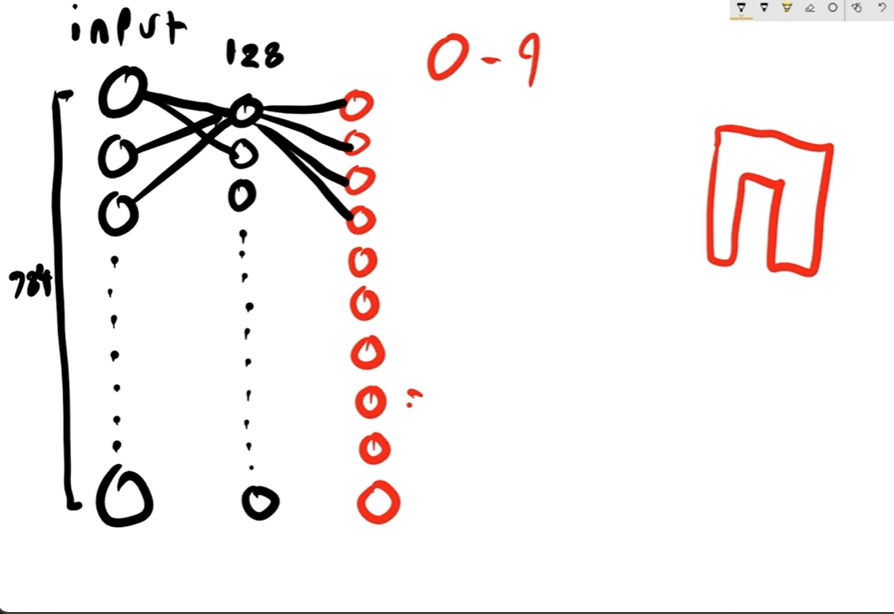


In [14]:
model = keras.Sequential([
    # First layer: Flatten the input data from 28x28 to a 1D vector
    keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden layer: Fully connected (Dense) layer with 128 neurons and ReLU activation
    keras.layers.Dense(128, activation="relu"),

    # Output layer: 10 neurons (for classes 0-9) with softmax activation for probabilities
    keras.layers.Dense(10, activation="softmax") # Softmax for class probability distribution
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimizer ("adam"):
Adam optimizer is used to update the model's weights during training. It combines the benefits of momentum (SGD) and adaptive learning rates (RMSProp).
Loss Function ("sparse_categorical_crossentropy"):
This is used for multi-class classification problems where labels are integers (not one-hot encoded).
The loss function measures how far the predicted probabilities are from the actual class and provides feedback to the optimizer.
Metrics (["accuracy"]):
This metric will track the percentage of correct predictions made by the model during training and evaluation.

In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [20]:
model.fit(train_images, train_label, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7838 - loss: 0.6279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8621 - loss: 0.3819
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8759 - loss: 0.3373
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8832 - loss: 0.3171
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8913 - loss: 0.2920


In [21]:
#evaluate our model
test_loss,test_acc=model.evaluate(test_images,test_label)
print("tested acc",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3359
tested acc 0.8762999773025513


In [25]:
#predict and use our model

prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])
 #predicted class name for the first image based on the highest probability.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ankle boot


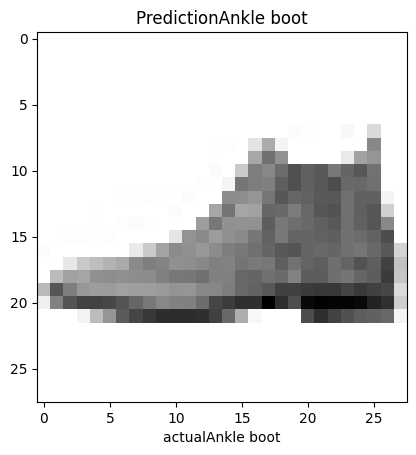

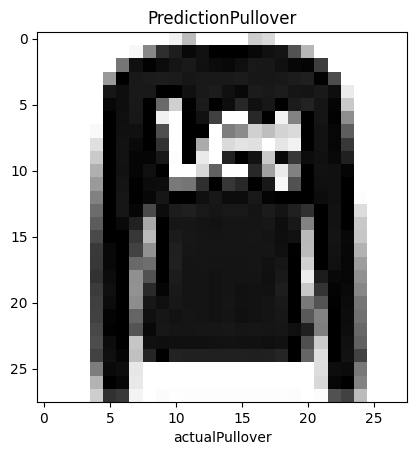

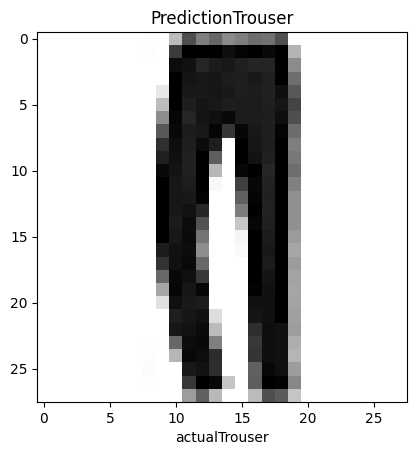

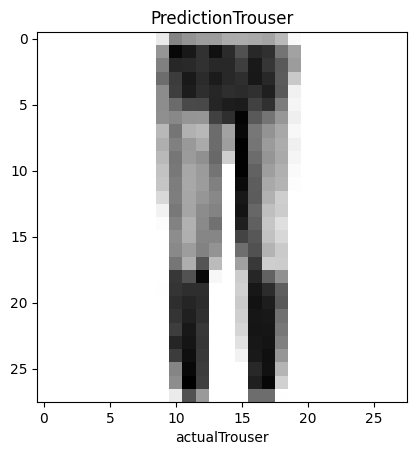

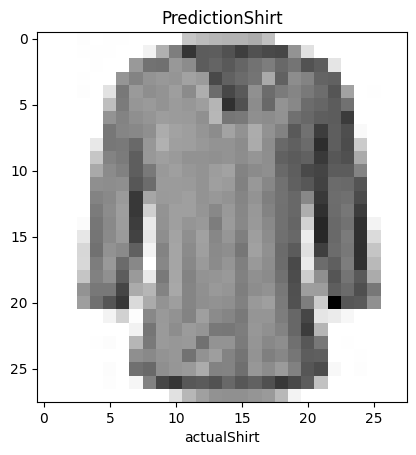

In [26]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("actual"+class_names[test_label[i]])
  plt.title("Prediction"+class_names[np.argmax(prediction[i])])
  plt.show()
